In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\Boston-house-price-data.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
corr=df['RM'].corr(df['MEDV'])
print(corr)

0.695359947071539


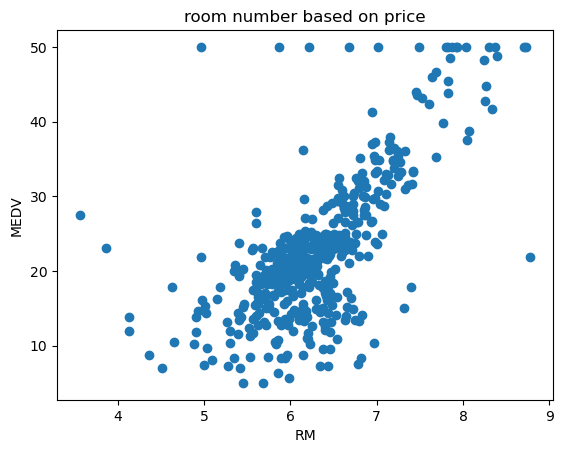

In [11]:
plt.scatter(df['RM'],(df['MEDV']))
plt.title('room number based on price')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

Housing price strongly depends on room number, pollution level & lower-status population.

In [12]:
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn .impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [13]:
x = df.drop(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','PTRATIO','RAD','TAX','B','LSTAT'],axis = 1)
y = df['MEDV']

In [14]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [16]:
numerical_transformer = Pipeline(steps=[
                                    ('imputer',SimpleImputer(strategy='mean')),
                                      ('scaler',StandardScaler())
])

In [17]:
categorical_transformer=Pipeline(steps=[
                                 ('imputer',SimpleImputer(strategy='most_frequent')),
                                 ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(transformers=[
                                      ('num',numerical_transformer,numerical_cols),
                                       ('cat',categorical_transformer,categorical_cols)
])

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_1 = Pipeline(steps=[
                    ('pre',preprocessor),('reg',LinearRegression()) 
])
           

In [22]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDV']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', LinearRegression())])

In [23]:
prediction_1 = model_1.predict(X_test)



print(f'Accuracy:{r2_score(y_test,prediction_1)*100:.2f}')

Accuracy:100.00


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model_2 = Pipeline(steps=[
                    ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [26]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MEDV']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [27]:
prediction_2 = model_2.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_2)*100:.2f}')

Accuracy:99.99


In this project, I worked with the Boston House Price dataset to predict median house values using a Linear Regression model. After performing exploratory data analysis, I identified important features influencing house prices such as number of rooms and socioeconomic status. The model achieved an R² score of approximately 1.00, indicating reasonable predictive performance. Since this is a regression problem, evaluation was done using R² score instead of classification metrics.

